In [2]:
# %run markethistory.py

In [3]:
import datetime
import pandas as pd
import graphlab as gl
import graphlab.aggregate as agg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

days_back = lambda n: datetime.date.today() - datetime.timedelta(days=n)

In [4]:
regions = gl.SFrame.read_csv("mapRegions.csv", usecols=['regionID', 'regionName'])
empire = """Aridia
Black Rise
The Bleak Lands
The Citadel
Derelik
Devoid
Domain
Essence
Everyshore
The Forge
Genesis
Heimatar
Kador
Khanid
Kor-Azor
Lonetrek
Metropolis
Molden Heath
Placid
Sinq Laison
Solitude
Tash-Murkon
Verge Vendor""".split('\n')
empire = regions.filter_by(empire, 'regionName')

Finished parsing file /Users/evrial/Dropbox/EVE data/mapRegions.csv

Parsing completed. Parsed 100 lines in 0.031239 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/evrial/Dropbox/EVE data/mapRegions.csv

Parsing completed. Parsed 100 lines in 0.011758 secs.

In [5]:
items = pd.read_csv("invTypes.csv")

types = gl.SFrame(items[['typeID', 'typeName']].astype(str))
types['typeID'] = types['typeID'].apply(int)

In [6]:
prices = gl.SFrame.read_csv('history.csv')

Finished parsing file /Users/evrial/Dropbox/EVE data/history.csv

Parsing completed. Parsed 100 lines in 0.731057 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,str,float,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 763888 lines. Lines per second: 662568

Read 8367042 lines. Lines per second: 1.28028e+06

Read 15306764 lines. Lines per second: 1.32422e+06

Read 22192328 lines. Lines per second: 1.3368e+06

Finished parsing file /Users/evrial/Dropbox/EVE data/history.csv

Parsing completed. Parsed 25330941 lines in 18.7898 secs.

In [7]:
prices['revenue'] = prices['avgPrice'] * prices['volume']
prices['date'] = prices['date'].str_to_datetime('%Y-%m-%dT%H:%M:%S')
prices

typeID,regionID,date,lowPrice,highPrice,avgPrice,volume,orderCount,revenue
11889,10000001,2015-09-08 00:00:00,282640.0,282640.0,282640.0,1,1,282640.0
11889,10000001,2015-09-17 00:00:00,282640.0,282640.0,282640.0,1,1,282640.0
11889,10000001,2015-09-29 00:00:00,282640.0,282640.0,282640.0,1,1,282640.0
11889,10000001,2015-10-01 00:00:00,282640.0,282640.0,282640.0,1,1,282640.0
11889,10000001,2015-11-07 00:00:00,282640.0,282640.0,282640.0,1,1,282640.0
11889,10000001,2015-11-10 00:00:00,282640.0,282640.0,282640.0,1,1,282640.0
11889,10000001,2015-11-12 00:00:00,282640.0,282640.0,282640.0,1,1,282640.0
11889,10000001,2015-11-15 00:00:00,282640.0,282640.0,282640.0,1,1,282640.0
11889,10000001,2015-11-16 00:00:00,282640.0,282640.0,282640.0,1,1,282640.0
11889,10000001,2015-11-30 00:00:00,282640.0,282640.0,282640.0,1,1,282640.0


In [8]:
prices.show()

Canvas is accessible via web browser at the URL: http://localhost:58161/index.html
Opening Canvas in default web browser.


PLEX volume sold last 13 months:

In [5]:
prices[prices['typeID'] == 29668]['volume'].sum()

1830839

In [21]:
books = types.filter_by(['Gallente Titan', 'Caldari Titan', 'Amarr Titan', 'Minmatar Titan'], 'typeName')['typeID']

titans = prices.filter_by(books, 'typeID').join(types, 'typeID').groupby(['typeName'], agg.SUM('volume'))

print titans['Sum of volume'].sum()
titans

1875


typeName,Sum of volume
Amarr Titan,548
Minmatar Titan,341
Gallente Titan,502
Caldari Titan,484


In [23]:
days_back(1) > days_back(30)

True

WH regions market top

In [18]:
prices[(prices['regionID'] >= 11000000) & (prices['date'] > days_back(30))] \
    .join(regions, on='regionID') \
    .join(types, on='typeID')\
    .groupby(['typeName', 'regionName'],
       [agg.COUNT(),
        agg.SUM('volume'),
        agg.AVG('revenue'),
        agg.SUM('revenue'),
        agg.STDV('revenue'),
#         agg.QUANTILE('revenue',[0.25, 0.75])
       ]).topk('Sum of revenue', k=15).to_dataframe()

,regionName,typeName,Count,Sum of volume,Avg of revenue,Sum of revenue,Stdv of revenue
0,D-R00019,Sleeper Drone AI Nexus,28,4853,"800,419,643.20","22,411,750,009.61","1,153,806,078.92"
1,F-R00030,Sleeper Drone AI Nexus,24,5353,"892,166,666.67","21,412,000,000.00","625,922,763.25"
2,D-R00019,Ancient Coordinates Database,27,10529,"540,307,444.42","14,588,300,999.47","473,094,456.99"
3,D-R00019,Sleeper Data Library,28,27395,"451,118,571.43","12,631,320,000.00","359,879,789.85"
4,F-R00030,Ancient Coordinates Database,25,8166,"391,968,000.00","9,799,200,000.00","292,856,233.29"
5,F-R00030,Sleeper Data Library,26,15417,"237,184,615.38","6,166,800,000.00","201,038,916.42"
6,D-R00019,Neural Network Analyzer,28,27487,"181,063,035.71","5,069,765,000.00","144,743,603.51"
7,D-R00021,Sleeper Data Library,17,10906,"288,688,235.29","4,907,700,000.00","193,010,852.73"
8,D-R00021,Ancient Coordinates Database,20,3570,"240,975,000.00","4,819,500,000.00","194,892,734.92"
9,D-R00019,Melted Nanoribbons,23,1957,"193,946,278.26","4,460,764,399.99","183,970,707.82"


In [37]:
prices[prices['date'] > days_back(30)] \
    .filter_by(empire['regionID'], 'regionID', exclude=False) \
    .join(regions, on='regionID').join(types, on='typeID') \
    .groupby(['typeName','regionName'],
       [agg.SUM('volume'),
        agg.AVG('avgPrice'),
        agg.AVG('revenue'),
        agg.SUM('revenue'),
        agg.STDV('avgPrice'),
        agg.QUANTILE('avgPrice',[0.25, 0.75])
       ]).topk('Sum of revenue', 100).to_dataframe()

,regionName,typeName,Sum of volume,Avg of avgPrice,Avg of revenue,Sum of revenue,Stdv of avgPrice,Quantiles of avgPrice
0,The Forge,30 Day Pilot's License Extension (PLEX),93597,"1,104,739,350.28","3,563,383,018,428.44","103,338,107,534,424.77","32,192,658.08","[1083012001.03, 1129133001.0]"
1,The Forge,Skill Injector,165870,"589,834,990.98","3,373,919,903,637.03","97,843,677,205,473.91","7,923,486.06","[583899998.99, 595300500.5]"
2,The Forge,Skill Extractor,129277,"263,233,979.75","1,171,889,193,605.06","33,984,786,614,546.65","8,863,910.55","[254899996.95, 271609996.0]"
3,Domain,30 Day Pilot's License Extension (PLEX),11923,"1,098,650,398.26","451,717,435,535.25","13,099,805,630,522.32","32,592,516.14","[1077100000.0, 1126000001.0]"
4,Domain,Skill Injector,15011,"602,124,469.65","311,656,354,316.77","9,038,034,275,186.44","8,984,687.63","[595499998.11, 609999990.65]"
5,Sinq Laison,30 Day Pilot's License Extension (PLEX),5382,"1,089,301,499.88","201,936,872,782.43","5,856,169,310,690.34","31,422,704.90","[1068000000.0, 1118000000.0]"
6,Sinq Laison,Skill Injector,6208,"611,278,008.82","130,710,654,094.57","3,790,608,968,742.60","10,140,328.45","[600000000.0, 618000000.0]"
7,Heimatar,30 Day Pilot's License Extension (PLEX),2599,"1,078,167,102.98","96,699,076,787.79","2,804,273,226,845.94","37,424,429.02","[1063671552.73, 1103050119.0]"
8,The Forge,23rd Tier Overseer's Personal Effects,19492,"130,531,191.53","87,733,830,092.05","2,544,281,072,669.51","655,457.51","[130000737.01, 131000001.24]"
9,Lonetrek,23rd Tier Overseer's Personal Effects,16706,"133,837,000.00","77,099,342,137.93","2,235,880,922,000.00",0.00,"[133837000.0, 133837000.0]"


In [29]:
prices[prices['date'] > days_back(30)] \
    .filter_by(empire['regionID'], 'regionID', exclude=True) \
    .join(regions, on='regionID') \
    .groupby(['regionName'],
       [agg.COUNT(),
        agg.SUM('revenue'),
       ]).topk('Sum of revenue', 200).to_dataframe()

,regionName,Count,Sum of revenue
0,Delve,37957,"4,586,640,533,459.18"
1,Providence,45575,"3,546,916,362,244.84"
2,Pure Blind,35692,"2,192,319,887,854.59"
3,Vale of the Silent,30357,"1,671,173,966,535.95"
4,Catch,28118,"1,377,435,927,118.04"
5,Geminate,21762,"943,175,073,263.35"
6,Fade,27992,"889,591,687,824.32"
7,Immensea,19524,"860,501,075,024.32"
8,Tribute,17625,"756,418,476,703.57"
9,Deklein,16360,"725,114,447,492.18"


In [42]:
d = prices[prices['date'] > days_back(30)].filter_by(empire['regionID'], 'regionID')
d['avgPrice'] = d['avgPrice'] / 1e9
d['lowPrice'] = d['lowPrice'] / 1e9
d['highPrice'] = d['highPrice'] / 1e9
d['revenue'] = d['revenue'] / 1e9

d = d.groupby(['typeID'],
       [agg.COUNT(),
        agg.AVG('avgPrice'),
        agg.STDV('avgPrice'),
        agg.MIN('lowPrice'),
        agg.MAX('highPrice'),
        agg.SUM('volume'),
        agg.SUM('revenue'),
        agg.AVG('revenue'),
        agg.QUANTILE('revenue',[0.25, 0.75]),
        agg.QUANTILE('avgPrice',[0.2, 0.8])
       ]).join(types, on='typeID').topk('Stdv of avgPrice', 100)

In [43]:
market_orders_domination = 0.1 # percent
d['Potential profit'] = d['Quantiles of avgPrice'].apply(lambda x: x[1] - x[0]) * d['Sum of volume'] * market_orders_domination
d['Recommended investment'] = d['Quantiles of avgPrice'].apply(lambda x: x[0]) * d['Sum of volume'] * market_orders_domination
d['ROI (volatility)'] = d['Potential profit'] / d['Recommended investment']
d.to_dataframe().sort_values(by='Potential profit', ascending=False)

,typeID,Count,Avg of avgPrice,Stdv of avgPrice,Min of lowPrice,Max of highPrice,Sum of volume,Sum of revenue,Avg of revenue,Quantiles of revenue,Quantiles of avgPrice,typeName,Potential profit,Recommended investment,ROI (volatility)
24,35833,39,13.34,1.02,10.00,15.50,124,"1,598.51",40.99,"[15.0, 53.0394389928]","[12.3, 14.599533158]",Fortizar,28.51,152.52,0.19
36,28848,49,7.72,0.78,5.00,8.50,127,991.26,20.23,"[7.75, 37.5991409716]","[7.5, 8.29974993046]",Anshar,10.16,95.25,0.11
2,28844,45,8.29,1.78,7.02,78.00,178,"1,500.78",33.35,"[9.25, 47.4499969171]","[7.8695133249, 8.29646949398]",Rhea,7.60,140.08,0.05
1,14830,5,2.65,3.15,0.87,8.95,8,16.48,3.30,"[1.119999998, 2.85999999498]","[0.95333333166, 8.95000000003]",Draclira's Modified Heavy Energy Nosferatu,6.40,0.76,8.39
68,28352,67,2.30,0.44,1.35,3.90,120,287.42,4.29,"[2.2, 4.79999999998]","[2.00149, 2.51699416998]",Rorqual,6.19,24.02,0.26
76,28850,45,7.49,0.41,6.14,8.65,156,"1,172.95",26.07,"[8.64749199, 37.5689933886]","[7.31504138544, 7.67599199133]",Ark,5.63,114.11,0.05
10,15220,9,2.35,1.26,0.00,3.85,17,42.23,4.69,"[2.76, 6.16599999999]","[0.355, 3.47833333333]",Brynn's Modified Energized EM Membrane,5.31,0.60,8.80
97,28846,37,6.94,0.32,6.00,7.70,112,781.04,21.11,"[7.1, 28.6393192917]","[6.74257642885, 7.15982982292]",Nomad,4.67,75.52,0.06
9,15248,6,1.71,1.30,0.30,3.90,21,41.82,6.97,"[0.61284, 15.624]","[0.30642, 2.51089999999]",Setele's Modified Armor EM Hardener,4.63,0.64,7.19
27,33529,15,5.25,0.91,4.05,6.30,20,103.70,6.91,"[4.50000000055, 8.53299995722]","[4.49945, 6.2989999657]",High-grade Ascendancy Omega,3.60,9.00,0.40


In [157]:
d.save('top200.csv', format='csv')

In [11]:
# PLEX
x = prices[prices['date'] > days_back(20)].join(regions, 'regionID').filter_by(29668, 'typeID').groupby(['regionName'],
       [agg.COUNT(),
        agg.MIN('lowPrice'),
        agg.MAX('highPrice'),
        agg.AVG('avgPrice'),
        agg.STDV('avgPrice'),
        agg.SUM('volume'),
        agg.SUM('revenue'),
        agg.AVG('revenue'),
#         agg.QUANTILE('revenue',[0.25, 0.75]),
        agg.QUANTILE('avgPrice',[0.2, 0.8])
       ])
x[x['Avg of avgPrice'] > 5e8].topk('Sum of revenue', 100).to_dataframe()

,regionName,Count,Min of lowPrice,Max of highPrice,Avg of avgPrice,Stdv of avgPrice,Sum of volume,Sum of revenue,Avg of revenue,Quantiles of avgPrice
0,The Forge,18,"971,051,003.00","1,037,899,992.00","995,498,066.71","9,101,202.63",51373,"51,119,257,226,603.09","2,839,958,734,811.28","[987001100.51, 1004888999.01]"
1,Domain,18,"961,010,000.09","1,046,994,966.00","982,149,825.36","10,935,595.74",6906,"6,779,505,117,375.64","376,639,173,187.54","[970670000.01, 990995969.04]"
2,Sinq Laison,18,"954,000,000.03","1,037,999,999.93","982,108,416.79","11,341,426.79",2593,"2,543,898,283,520.13","141,327,682,417.78","[973000100.0, 992099999.99]"
3,Heimatar,18,"943,000,001.04","1,028,999,998.90","985,360,676.63","16,231,245.05",1464,"1,437,560,109,554.66","79,864,450,530.81","[973739206.97, 1003253963.43]"
4,Metropolis,18,"949,385,656.55","1,037,999,998.98","988,616,880.94","12,385,200.52",1089,"1,076,225,915,846.21","59,790,328,658.12","[978647327.01, 999295734.23]"
5,Essence,18,"900,000,000.00","1,042,000,498.50","982,676,250.32","11,394,252.84",634,"622,970,826,579.38","34,609,490,365.52","[971470595.24, 989549697.0]"
6,Lonetrek,18,"938,000,000.01","1,047,999,999.50","983,110,056.81","13,297,166.94",619,"606,463,953,110.10","33,692,441,839.45","[974749215.73, 991932867.38]"
7,Verge Vendor,18,"95,000,001.16","1,044,499,999.50","967,863,073.11","16,998,434.82",628,"606,459,214,359.17","33,692,178,575.51","[951558064.84, 978617241.06]"
8,Providence,18,"831,049,301.23","1,078,999,999.99","964,499,971.82","33,779,944.70",427,"409,401,328,170.04","22,744,518,231.67","[918833447.73, 994233846.14]"
9,The Citadel,18,"939,555,061.01","1,058,999,998.97","975,539,437.92","17,595,608.84",393,"382,542,834,496.52","21,252,379,694.25","[956977176.09, 986938695.77]"


In [8]:
regions[regions['regionName']=='Great Wildlands']

regionID,regionName
10000011,Great Wildlands


In [9]:
# provi
prices[prices['date'] > days_back(20)].filter_by(10000011, 'regionID').join(types, 'typeID').groupby(['typeName'],
       [agg.COUNT(),
        agg.AVG('avgPrice'),
        agg.STDV('avgPrice'),
        agg.SUM('volume'),
        agg.SUM('revenue'),
        agg.AVG('revenue')
       ]).topk('Sum of revenue', 100).to_dataframe()

,typeName,Count,Avg of avgPrice,Stdv of avgPrice,Sum of volume,Sum of revenue,Avg of revenue
0,Rorqual,1,"2,880,000,000.00",0.00,1,"2,880,000,000.00","2,880,000,000.00"
1,Skill Injector,1,"585,000,000.89",0.00,3,"1,755,000,002.67","1,755,000,002.67"
2,Hydrogen Fuel Block,8,"23,788.99","2,031.10",52083,"1,195,856,958.79","149,482,119.85"
3,Oxygen Isotopes,9,822.28,100.24,869545,"698,067,827.84","77,563,091.98"
4,Nitrogen Isotopes,9,"1,111.11",207.87,614977,"620,971,310.00","68,996,812.22"
5,Einherji II,3,"13,833,333.33","942,809.04",44,"584,000,000.00","194,666,666.67"
6,Cynosural Field Generator I,19,"2,805,371.08","391,663.06",205,"562,399,928.24","29,599,996.22"
7,Hydrogen Isotopes,12,999.67,146.63,479660,"477,388,500.00","39,782,375.00"
8,Helium Isotopes,7,"1,255.00",347.83,274813,"402,586,735.00","57,512,390.71"
9,Prowler,1,"280,000,000.00",0.00,1,"280,000,000.00","280,000,000.00"


In [10]:
prices[prices['date'] > days_back(30)].filter_by(
    values=[29668, 40519, 40520],
    column_name='typeID', exclude=False).join(regions, 'regionID').groupby(['regionName'],
       [agg.SUM('orderCount'),
        agg.SUM('revenue'),
        agg.AVG('revenue')
       ]).topk('Sum of revenue', 100).to_dataframe()

,regionName,Sum of orderCount,Sum of revenue,Avg of revenue
0,The Forge,161001,"227,462,780,229,271.94","2,614,514,715,278.99"
1,Domain,22341,"24,228,137,544,339.18","278,484,339,590.11"
2,Sinq Laison,9178,"9,943,599,198,870.89","114,294,243,665.18"
3,Heimatar,4787,"4,894,864,427,242.17","56,262,809,508.53"
4,Metropolis,2936,"2,986,080,691,077.06","34,322,766,564.10"
5,Lonetrek,1898,"2,310,954,716,448.31","27,187,702,546.45"
6,Essence,1976,"2,142,524,205,238.82","24,913,072,153.94"
7,Verge Vendor,1229,"1,484,173,375,236.06","19,027,863,785.08"
8,Providence,1154,"1,128,054,106,435.09","13,429,215,552.80"
9,The Citadel,975,"1,112,783,843,722.44","13,091,574,632.03"


In [44]:
prices[prices['date'] > days_back(20)] \
    .join(types, 'typeID').join(regions, 'regionID') \
    .filter_by(values=['Moros', 'Naglfar', 'Archon', 'Apostle', 'Nidhoggur', 'Chimera', 'Thanatos', 'Phoenix', 'Revelation', 'Rorqual'], column_name='typeName') \
    .groupby(['typeName', 'regionName'],
       [agg.COUNT(),
        agg.MIN('lowPrice'),
        agg.MAX('highPrice'),
        agg.AVG('avgPrice'),
        agg.STDV('avgPrice'),
        agg.SUM('volume'),
        agg.SUM('revenue'),
        agg.AVG('revenue'),
        agg.QUANTILE('avgPrice',[0.2, 0.8])
       ]).topk('Sum of revenue', 100).to_dataframe()

,regionName,typeName,Count,Min of lowPrice,Max of highPrice,Avg of avgPrice,Stdv of avgPrice,Sum of volume,Sum of revenue,Avg of revenue,Quantiles of avgPrice
0,The Forge,Rorqual,7,"2,003,016,000.00","3,899,999,999.00","2,764,424,910.34","609,461,056.20",20,"58,653,688,987.57","8,379,098,426.80","[2003031000.0, 3119944498.83]"
1,Lonetrek,Rorqual,8,"1,610,100,050.74","2,899,999,994.50","2,133,517,947.48","431,608,306.14",23,"52,021,318,631.83","6,502,664,828.98","[1610326203.67, 2490000000.0]"
2,The Forge,Phoenix,14,"1,990,109,000.00","2,400,000,000.00","2,105,818,520.50","107,995,309.05",21,"44,393,696,464.27","3,170,978,318.88","[1991118000.0, 2228793000.0]"
3,Lonetrek,Naglfar,11,"1,616,000,139.99","1,889,956,954.34","1,730,679,946.97","108,667,781.40",22,"38,205,958,701.16","3,473,268,972.83","[1616000163.07, 1848000000.0]"
4,Delve,Nidhoggur,13,"1,500,000,000.00","2,700,000,000.00","2,004,487,179.49","369,327,978.65",17,"34,020,000,000.03","2,616,923,076.93","[1600000000.0, 2375000000.0]"
5,The Forge,Nidhoggur,12,"1,000,003,022.06","1,799,999,999.99","1,433,175,274.97","234,628,818.12",19,"27,445,569,877.38","2,287,130,823.12","[1290672340.29, 1635983992.9]"
6,Lonetrek,Moros,13,"1,305,636,989.99","1,998,899,898.99","1,637,698,898.16","240,986,894.10",16,"26,460,810,574.89","2,035,446,967.30","[1305638007.33, 1849000000.0]"
7,The Citadel,Rorqual,6,"1,831,992,999.66","2,399,999,999.99","2,246,415,499.19","192,907,149.61",11,"25,002,992,987.61","4,167,165,497.93","[2268499998.5, 2399999999.99]"
8,The Forge,Chimera,13,"951,057,000.01","1,418,950,000.00","1,097,651,126.91","95,562,350.60",23,"24,918,372,999.01","1,916,797,923.00","[953074000.0, 1169000000.0]"
9,The Forge,Thanatos,13,"1,100,000,000.00","1,400,010,000.00","1,266,507,884.68","105,333,637.42",20,"24,811,161,000.79","1,908,550,846.21","[1100060000.81, 1366988999.99]"


In [47]:
prices[prices['date'] > days_back(20)] \
    .join(types, 'typeID').join(regions, 'regionID') \
    .filter_by(values=['Apostle', 'Rorqual'], column_name='typeName').to_dataframe().sort_values(by='date')

,typeID,regionID,date,lowPrice,highPrice,avgPrice,volume,orderCount,revenue,typeName,regionName
115,37604,10000049,2016-09-19,"1,070,000,000.00","1,075,000,000.00","1,072,500,000.00",2,2,"2,145,000,000.00",Apostle,Khanid
119,28352,10000053,2016-09-19,"2,400,000,000.00","2,400,000,000.00","2,400,000,000.00",1,1,"2,400,000,000.00",Rorqual,Cobalt Edge
62,37604,10000032,2016-09-19,"1,250,000,000.00","1,250,000,000.00","1,250,000,000.00",1,1,"1,250,000,000.00",Apostle,Sinq Laison
13,37604,10000002,2016-09-19,"870,000,000.00","870,000,000.00","870,000,000.00",1,1,"870,000,000.00",Apostle,The Forge
81,28352,10000040,2016-09-19,"2,350,000,000.00","2,350,000,000.00","2,350,000,000.00",1,1,"2,350,000,000.00",Rorqual,Oasa
135,37604,10000060,2016-09-19,"1,249,999,999.90","1,249,999,999.90","1,249,999,999.90",2,2,"2,499,999,999.80",Apostle,Delve
99,28352,10000047,2016-09-19,"2,499,999,999.00","2,499,999,999.99","2,499,999,999.50",2,2,"4,999,999,999.00",Rorqual,Providence
150,37604,10000067,2016-09-19,"1,300,000,002.84","1,300,000,002.84","1,300,000,002.84",2,1,"2,600,000,005.68",Apostle,Genesis
14,37604,10000002,2016-09-20,"1,094,999,000.00","1,247,000,000.00","1,160,775,999.99",9,9,"10,446,983,999.91",Apostle,The Forge
51,28352,10000025,2016-09-20,"2,200,000,000.00","2,200,000,000.00","2,200,000,000.00",1,1,"2,200,000,000.00",Rorqual,Immensea


In [8]:
ts_forge = prices[prices['regionID'] == 10000002].join(types, 'typeID').to_dataframe().set_index('date')

In [16]:
ts_forge[ts_forge.typeName.isin(officers)]

,typeID,regionID,lowPrice,highPrice,avgPrice,volume,orderCount,revenue,typeName
date,,,,,,,,,
2015-09-02,14540,10000002,"3,799,999,000.00","3,800,000,000.00","3,799,999,500.00",2,2,"7,599,999,000.00",Gotan's Modified Gyrostabilizer
2015-09-24,14540,10000002,"3,000,003,001.95","3,000,003,001.99","3,000,003,001.97",2,2,"6,000,006,003.94",Gotan's Modified Gyrostabilizer
2015-10-01,14540,10000002,"3,999,999,999.91","3,999,999,999.91","3,999,999,999.91",1,1,"3,999,999,999.91",Gotan's Modified Gyrostabilizer
2015-11-07,14540,10000002,"3,000,004,001.00","3,000,004,001.00","3,000,004,001.00",1,1,"3,000,004,001.00",Gotan's Modified Gyrostabilizer
2016-02-25,14540,10000002,"3,000,006,000.00","3,000,006,000.00","3,000,006,000.00",1,1,"3,000,006,000.00",Gotan's Modified Gyrostabilizer
2016-03-14,14540,10000002,"4,999,995,049.33","4,999,995,049.33","4,999,995,049.33",1,1,"4,999,995,049.33",Gotan's Modified Gyrostabilizer
2016-04-21,14540,10000002,"4,595,999,995.00","4,595,999,995.00","4,595,999,995.00",2,1,"9,191,999,990.00",Gotan's Modified Gyrostabilizer
2016-04-29,14540,10000002,"3,001,001,000.00","3,001,001,001.09","3,001,001,000.55",2,2,"6,002,002,001.10",Gotan's Modified Gyrostabilizer
2016-05-05,14540,10000002,"4,392,998,999.99","4,392,998,999.99","4,392,998,999.99",1,1,"4,392,998,999.99",Gotan's Modified Gyrostabilizer


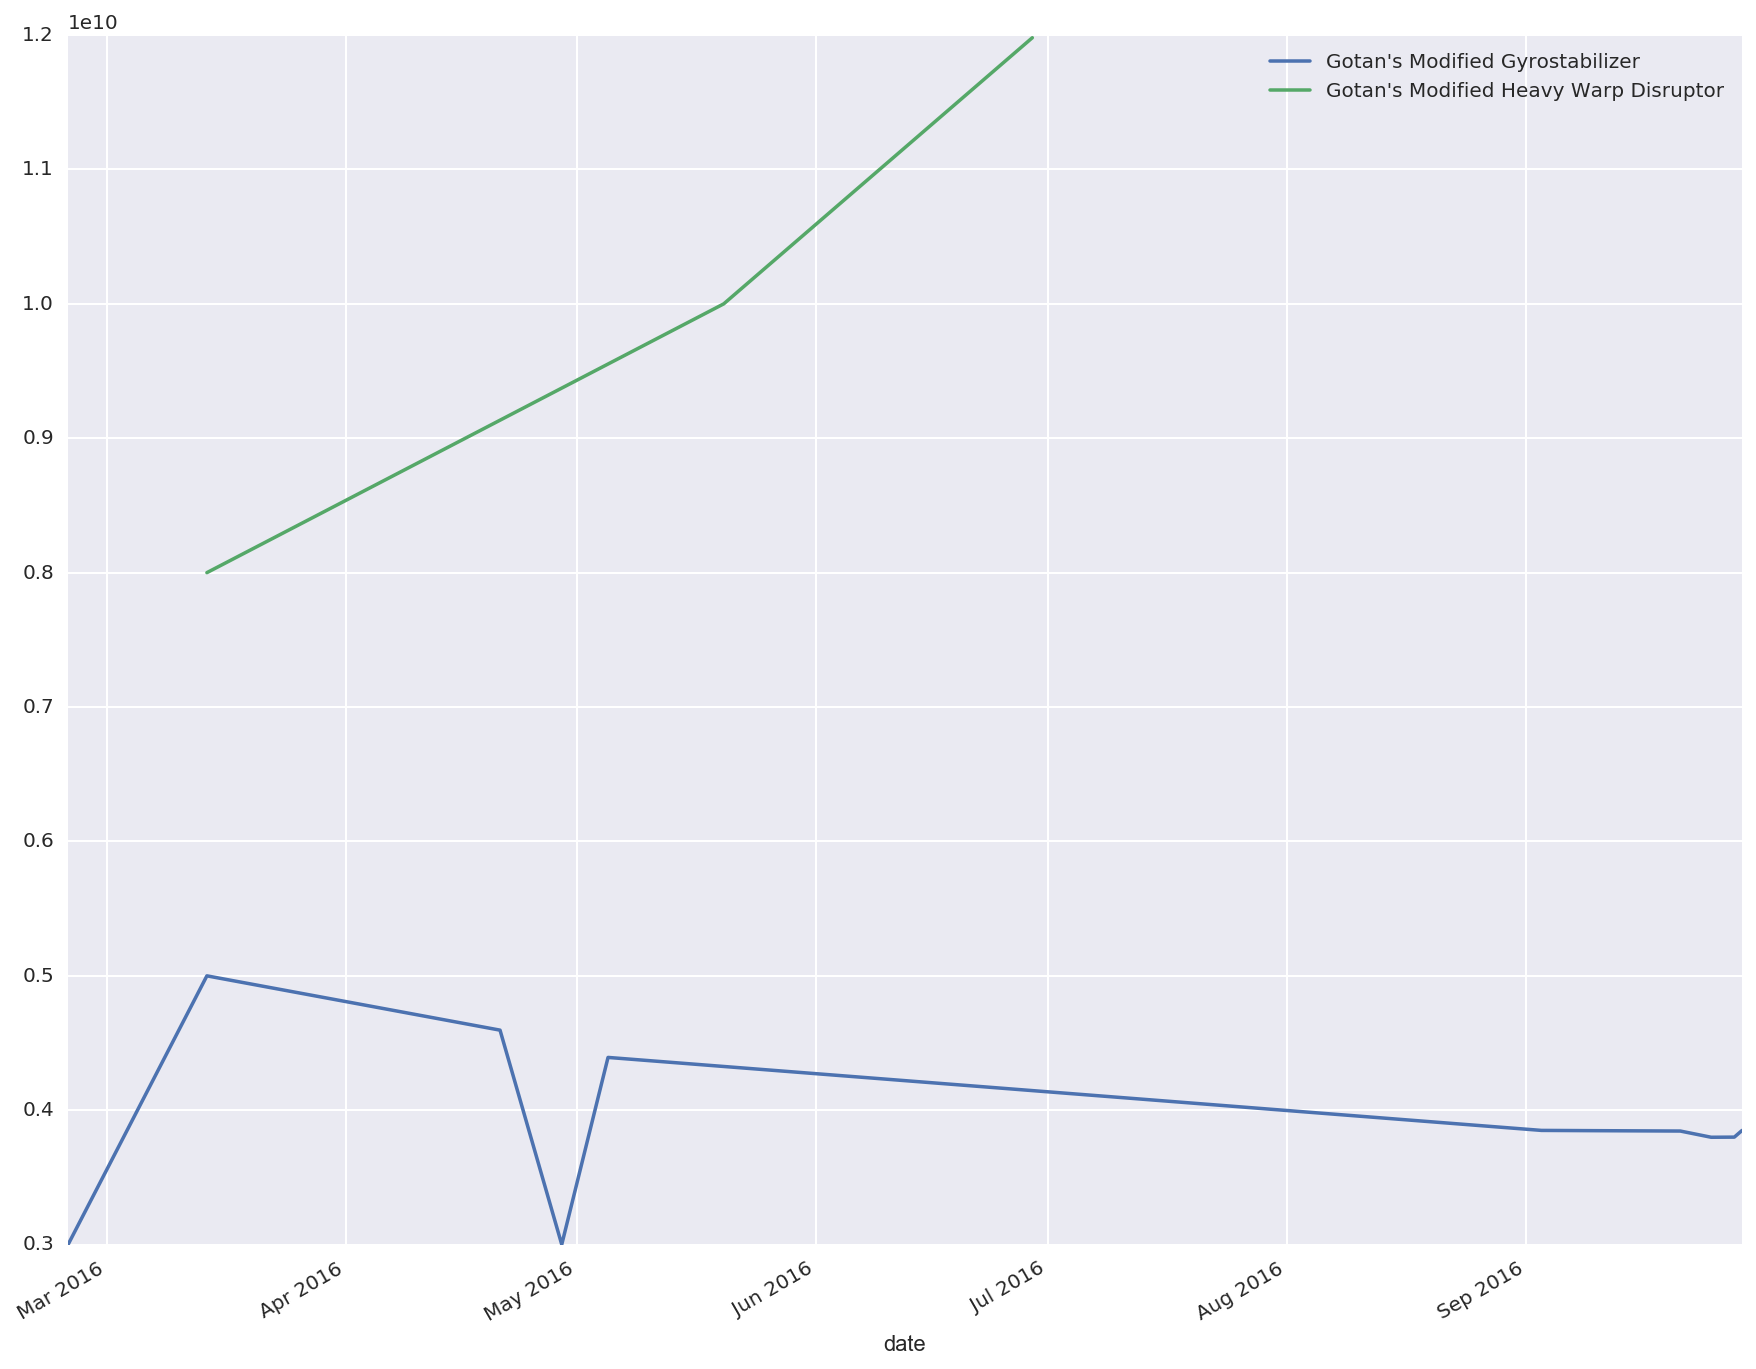

In [14]:
import seaborn as sns

citadel_materials = (
    'Integrity Response Drones',
    'Organic Mortar Applicators',
    'Broadcast Node',
    'Nano-Factory',
    'Recursive Computing Module',
    'Self-Harmonizing Power Core',
    'Sterile Conduits',
    'Wetware Mainframe'
)
officers = (
    "Gotan's Modified Gyrostabilizer",
     "Gotan's Modified Heavy Warp Disruptor" 
# "Chelm's Modified Heat Sink", # 6.1 bils
# "Chelm's Modified Power Diagnostic System", # 5.2 bils 
# "Chelm's Modified Energized Kinetic Membrane", # 1.7 bils
# "Chelm's Modified Mega Beam Laser", # 1 bil
# "Chelm's Modified Large Armor Repairer", # 800 mils
# "Unit W-634's Modified Drone Damage Amplifier"
)
rmt_tokens = ("30 Day Pilot's License Extension (PLEX)", "Skill Extractor", "Skill Injector")
jfs = ('Rhea','Anshar','Ark','Nomad')
fuel = ()



for i in officers:
    ts_forge[ts_forge.typeName == i]['2016-01':].avgPrice.plot(figsize=(15, 12), label=i, logy=False)

plt.legend(loc='best');

In [336]:
items_dict = {v.decode('utf-8'): k for k, v in items.set_index('typeID').typeName.dropna().to_dict().iteritems()}
len(items_dict)

29636

In [190]:
def crest_market_hist(typeid, regionid=10000002):
    import requests
    from pandas.io.json import json_normalize
    url='https://crest-tq.eveonline.com/market/{}/history/?type=https://crest-tq.eveonline.com/inventory/types/{}/'\
        .format(regionid,typeid)
    r = requests.get(url).json()
    df = json_normalize(r, 'items')
    df.date = pd.to_datetime(df.date, infer_datetime_format=True)
    return df.set_index('date')

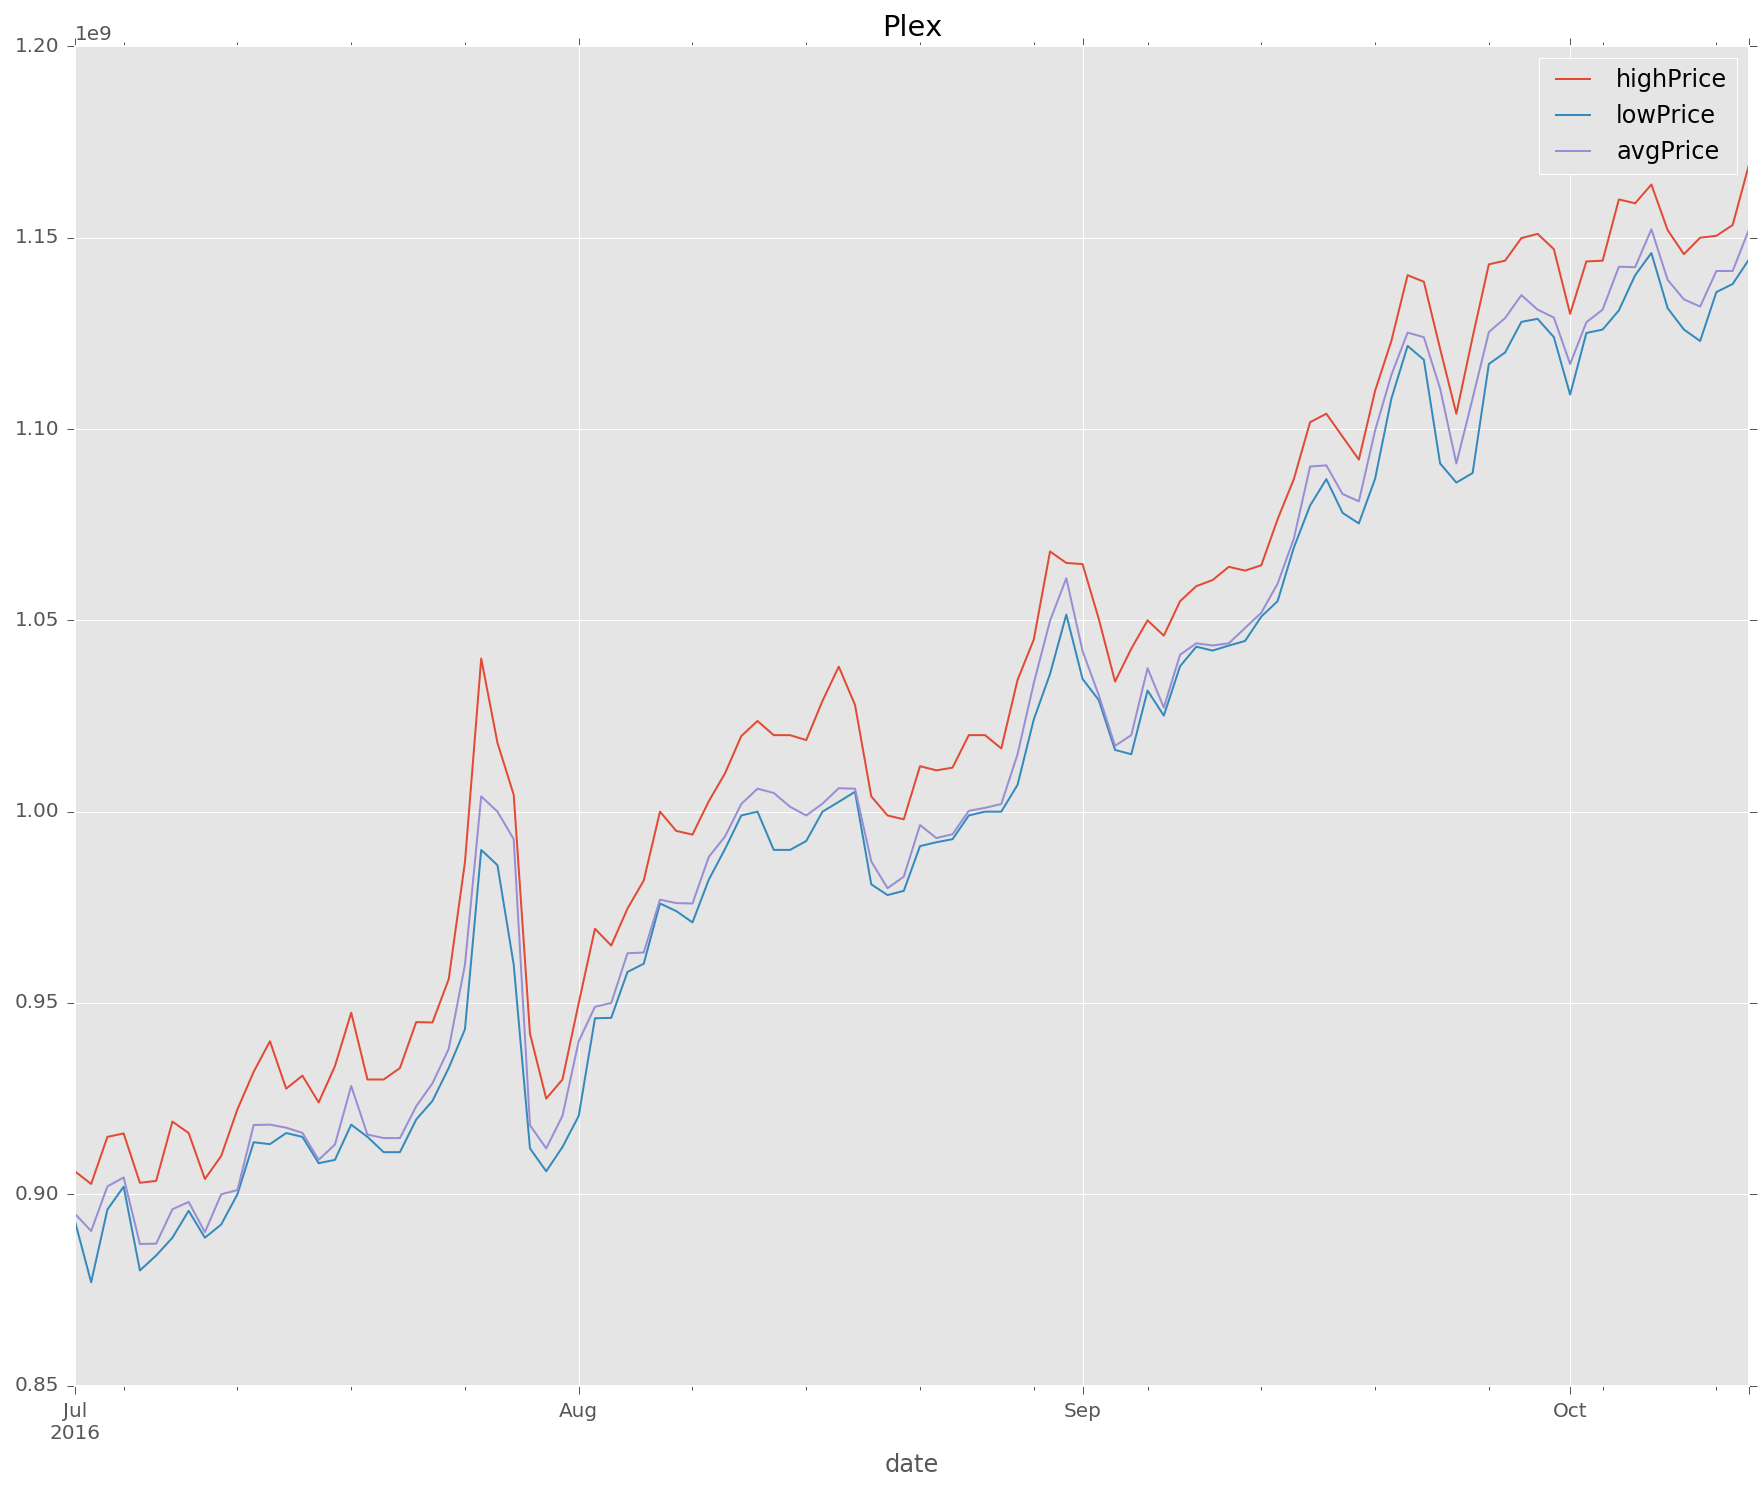

In [194]:
crest_market_hist(29668)['2016-07':][['highPrice','lowPrice','avgPrice']].plot(figsize=(15,12)).set_title('Plex')

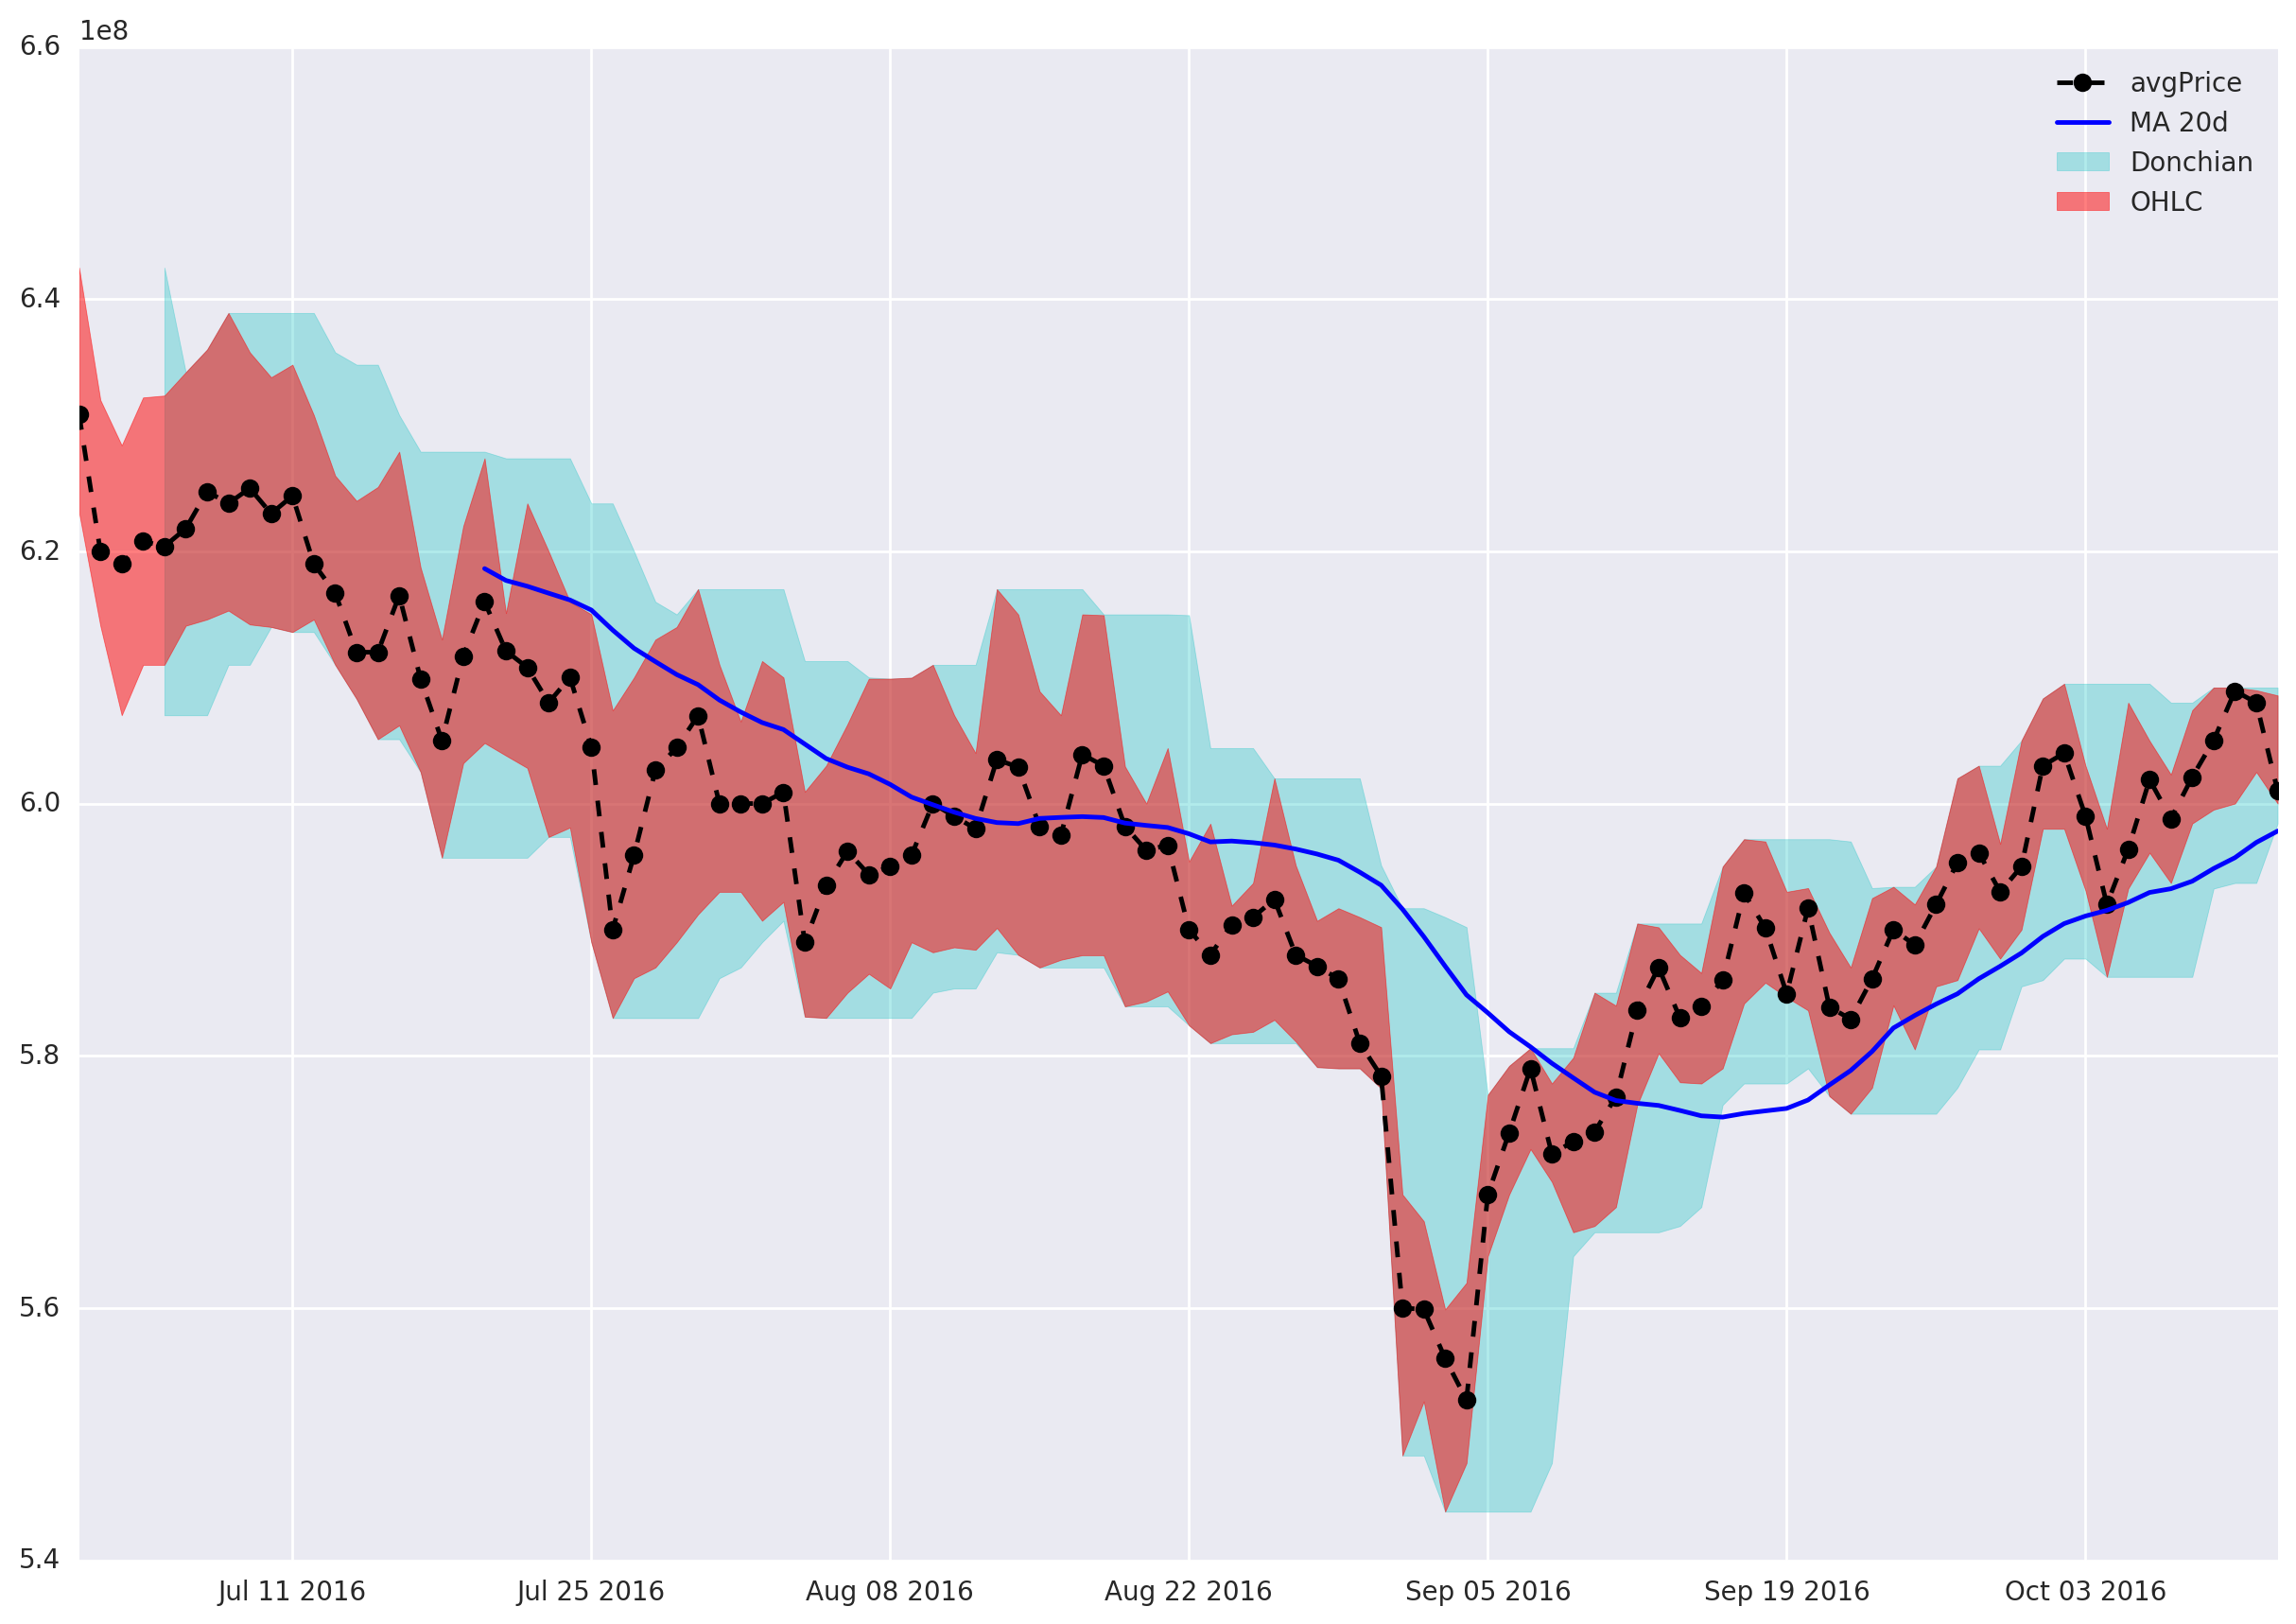

In [384]:
data = crest_market_hist(items_dict['Skill Injector'])['2016-07':]
ma = data.avgPrice.rolling(20).mean()
mstd = data.avgPrice.rolling(20).std()
moving_min = data.lowPrice.rolling(5).min()
moving_max = data.highPrice.rolling(5).max()

plt.figure(figsize=(15,10))

plt.plot(data.index, data.avgPrice, '--ko')

plt.plot(ma.index, ma, 'b', label='MA 20d')

# plt.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2, label='MSTD')
plt.fill_between(moving_max.index, moving_min, moving_max, color='c', alpha=0.3, label='Donchian')
plt.fill_between(data.index, data.highPrice, data.lowPrice, color='r', alpha=0.5, label='OHLC')
plt.legend(loc='best');